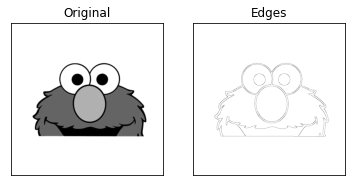

In [19]:
import numpy as np
from PIL import Image
import cv2 as cv
from matplotlib import pyplot as plt
import svgwrite
import potrace
import os


dirname = os.path.dirname(os.path.abspath("__file__"))
filename = os.path.join(dirname, './elmo.jpg')

img = cv.imread(filename, 0)

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap='Greys')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

plt.show()


#img = Image.fromarray( np.asarray( np.clip(edges,0,255), dtype="uint8"), "L" )
#img.save( 'output.svg' )



In [20]:
## testing with contours
img2 = cv.imread('./elmo.jpg')
imgray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
edges2 = cv.Canny(imgray, 60, 180)
ret, thresh = cv.threshold(edges2, 127, 255, 0)
contours, hierachy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

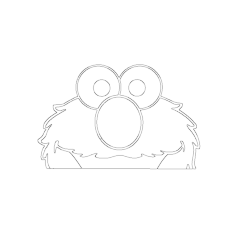

In [21]:


bg = np.zeros((img.shape), dtype = "uint8")

imgray2 = cv.drawContours(bg, contours, -1, (255, 255, 255), 1)

plt.imshow(imgray2,cmap='Greys')
plt.axis('off')
plt.savefig("elmo2.svg", format="svg")


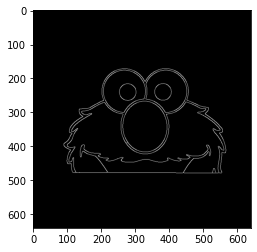

In [22]:
## used new resources: https://towardsdatascience.com/edges-and-contours-basics-with-opencv-66d3263fd6d1

## testing with contours
img2 = cv.imread('./elmo.jpg')
imgray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
edges2 = cv.Canny(imgray, 100, 150)

contours = cv.findContours(edges2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)


bg = np.zeros((img2.shape), dtype = "uint8")

imgray2 = cv.drawContours(bg, contours[0], -1, (255, 255, 255),  -1)



plt.imshow(imgray2,cmap='Greys')


In [9]:
# experimenting with svgtrace
from pathlib import Path
from svgtrace import trace

dirname = os.path.dirname(os.path.abspath("__file__"))
filename = os.path.join(dirname, './elmo.jpg')



bw = open(dirname + "/elmo.svg", "w")
bw.write(trace(dirname + "/elmo-bw.png", True))
bw.close()

### I get a runtime error: this event loop is already running
# Unfortunately, I am not too familiar with the svgtrace library to fix it

RuntimeError: This event loop is already running